# Data Processing

### Import libs

In [22]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from IPython.display import display
import plotly.express as px
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import plotly.io as pio
from geobr import read_state

## Analise de CSV Eleitoral 

### Carregando CSV votacao_partido_munzona_2022_BR

In [23]:
df_eleicoes_22 = pd.read_csv("../data_lake/raw/csv/votacao_partido_munzona_2022_BR.csv",sep=";",decimal=",",encoding="Latin 1")

### Agrupando total de votos

In [24]:
df_eleicoes_22["QTD_VOTOS_VALIDOS"] = (
    df_eleicoes_22["QT_VOTOS_LEGENDA_VALIDOS"] +
    df_eleicoes_22["QT_VOTOS_NOM_CONVR_LEG_VALIDOS"] +
    df_eleicoes_22["QT_TOTAL_VOTOS_LEG_VALIDOS"] +
    df_eleicoes_22["QT_VOTOS_NOMINAIS_VALIDOS"]
)

### Removendo colunas desnecessarias

In [25]:
colunas_para_remover = [
    "ST_VOTO_EM_TRANSITO",
    "QT_VOTOS_LEGENDA_ANUL_SUBJUD",
    "QT_VOTOS_NOMINAIS_ANUL_SUBJUD",
    "QT_VOTOS_LEGENDA_ANULADOS",
    "QT_VOTOS_NOMINAIS_ANULADOS",
    "DT_GERACAO", 
    "HH_GERACAO",  
    "CD_TIPO_ELEICAO",
    "NM_TIPO_ELEICAO", 
    "NR_TURNO", 
    "CD_ELEICAO", 
    "DS_ELEICAO", 
    "DT_ELEICAO",
    "TP_ABRANGENCIA",  
    "SG_UE", 
    "NM_UE",
    "CD_CARGO",
    "CD_MUNICIPIO",    
    "NR_ZONA",  
    "TP_AGREMIACAO",
    "NR_PARTIDO",  
    "NR_FEDERACAO",
    "NM_FEDERACAO",
    "SG_FEDERACAO", 
    "DS_COMPOSICAO_FEDERACAO",
    "SQ_COLIGACAO", 
    "NM_COLIGACAO", 
    "DS_COMPOSICAO_COLIGACAO",
    'QT_VOTOS_LEGENDA_VALIDOS',
    'QT_VOTOS_NOM_CONVR_LEG_VALIDOS',
    'QT_TOTAL_VOTOS_LEG_VALIDOS',
    'QT_VOTOS_NOMINAIS_VALIDOS'
]
df_eleicoes_novo = df_eleicoes_22.drop(columns=colunas_para_remover)


### Agrupando por estado e partido

In [26]:
df_resultados_agregados = df_eleicoes_novo.groupby(["SG_UF", "SG_PARTIDO"])["QTD_VOTOS_VALIDOS"].sum().reset_index()

#### Consulta por Estado

In [27]:
df_resultados = df_resultados_agregados[df_resultados_agregados['SG_UF'] == 'AM']

### Distribuição de Votos no Amazonas

/tmp/ipykernel_865908/4042512051.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



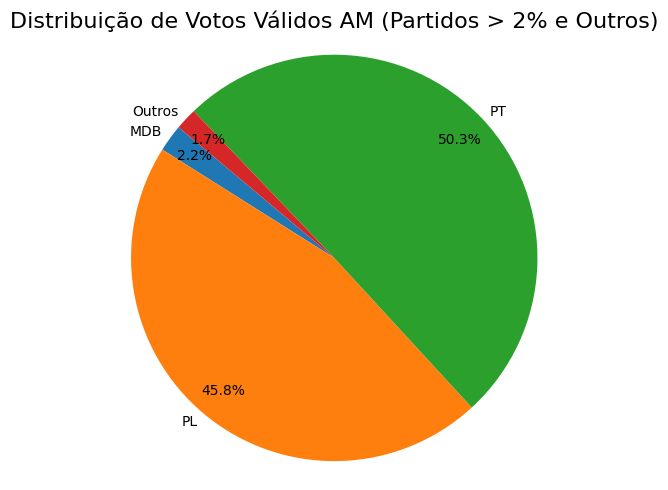

In [28]:
total_votos_geral = df_resultados['QTD_VOTOS_VALIDOS'].sum()
df_resultados['PORCENTAGEM'] = (df_resultados['QTD_VOTOS_VALIDOS'] / total_votos_geral) * 100

# --- PASSO 3: Identificar partidos com mais de 2% e agrupar os demais ---
threshold_percent = 2 # Limite de 2%

# Partidos que estão acima do limite
df_maiores_partidos = df_resultados[df_resultados['PORCENTAGEM'] > threshold_percent].copy()

# Somar os votos dos partidos que estão abaixo ou igual ao limite
votos_outros_partidos = df_resultados[df_resultados['PORCENTAGEM'] <= threshold_percent]['QTD_VOTOS_VALIDOS'].sum()

# Criar uma nova linha para a categoria "Outros"
df_outros = pd.DataFrame([{'SG_PARTIDO': 'Outros', 'QTD_VOTOS_VALIDOS': votos_outros_partidos}])

# Concatenar os maiores partidos com a categoria "Outros"
df_para_pizza = pd.concat([df_maiores_partidos[['SG_PARTIDO', 'QTD_VOTOS_VALIDOS']], df_outros], ignore_index=True)


plt.figure(figsize=(5, 5))

plt.pie(df_para_pizza['QTD_VOTOS_VALIDOS'],
        labels=df_para_pizza['SG_PARTIDO'],
        autopct='%1.1f%%',
        startangle=140,
        pctdistance=0.85, 
        labeldistance=1.05) 

plt.title(f'Distribuição de Votos Válidos AM (Partidos > {threshold_percent}% e Outros)', fontsize=16)

plt.axis('equal') 

plt.tight_layout()
plt.show()

## Analise de XLSX Ideologico

### Importando XLSX legenda_por_ideologia

In [29]:
df_ideologia = pd.read_excel("../data_lake/raw/xlsx/legenda_por_ideologia.xlsx")

In [30]:
df_ideologia

,Sigla do Partido,Nome Completo do Partido,Classificação Ideológica Consolidada,Notas sobre a Classificação
0,PL,Partido Liberal,Direita,Consenso baseado em múltiplas fontes recentes ...
1,PT,Partido dos Trabalhadores,Esquerda,Consenso baseado em múltiplas fontes recentes
2,MDB,Movimento Democrático Brasileiro,Centro,"Consenso majoritário, apesar de classificações..."
3,PSDB,Partido da Social Democracia Brasileira,Centro,"Consenso majoritário, com algumas fontes indic..."
4,PSB,Partido Socialista Brasileiro,Centro-Esquerda,Consenso baseado em múltiplas fontes
5,PP,Progressistas,Direita,Consenso baseado em múltiplas fontes
6,PSD,Partido Social Democrático,Centro,"Consenso majoritário, com algumas fontes indic..."
7,PSOL,Partido Socialismo e Liberdade,Esquerda,Consenso baseado em múltiplas fontes
8,NOVO,Partido Novo,Direita,Consenso baseado em múltiplas fontes
9,PDT,Partido Democrático Trabalhista,Centro-Esquerda,Consenso baseado em múltiplas fontes


### Analisando Votos por sigla e Ideologia

In [31]:
df_total_votos_rs_por_partido = pd.DataFrame(df_resultados)

df_combinado = pd.merge(df_total_votos_rs_por_partido,
                        df_ideologia[['Sigla do Partido', 'Classificação Ideológica Consolidada']],
                        left_on='SG_PARTIDO',
                        right_on='Sigla do Partido',
                        how='left') 

df_combinado = df_combinado.drop(columns=['Sigla do Partido'])


df_combinado

,SG_UF,SG_PARTIDO,QTD_VOTOS_VALIDOS,PORCENTAGEM,Classificação Ideológica Consolidada
0,AM,DC,267,0.006636,Direita
1,AM,MDB,87060,2.163837,Centro
2,AM,NOVO,5212,0.129542,Direita
3,AM,PCB,476,0.011831,Extrema-Esquerda
4,AM,PDT,44527,1.106699,Centro-Esquerda
5,AM,PL,1841939,45.780567,Direita
6,AM,PSTU,393,0.009768,Extrema-Esquerda
7,AM,PT,2024675,50.322388,Esquerda
8,AM,PTB,1373,0.034125,Centro-Esquerda
9,AM,UNIÃO,17002,0.422577,Centro-Direita


## Analise de Indices

In [32]:
# Caminhos dos datasets fornecidos
gini_path = Path('../data_lake/raw/csv/gini_uf_2022.csv')
ana_path  = Path('../data_lake/raw/csv/analfabetismo_uf_2022.csv')

# Leitura dos CSVs
df_gini = pd.read_csv(gini_path)   # colunas esperadas: UF,Estado,2022
df_ana  = pd.read_csv(ana_path)    # colunas esperadas: UF,Estado,2022

# Normalização de nomes
df_gini.rename(columns={'2022': 'gini'}, inplace=True)
df_ana.rename(columns={'2022': 'analfabetismo'}, inplace=True)

# Mescla (preserva estado/nome)
df = pd.merge(df_gini[['UF', 'Estado', 'gini']],
              df_ana[['UF', 'analfabetismo']],
              on='UF', how='inner')

# Define região para cores do scatter (ajuste se já houver coluna)
regiao_map = {
    'AC':'Norte','AP':'Norte','AM':'Norte','PA':'Norte','RO':'Norte','RR':'Norte','TO':'Norte',
    'AL':'Nordeste','BA':'Nordeste','CE':'Nordeste','MA':'Nordeste','PB':'Nordeste','PE':'Nordeste','PI':'Nordeste','RN':'Nordeste','SE':'Nordeste',
    'GO':'Centro-Oeste','MT':'Centro-Oeste','MS':'Centro-Oeste','DF':'Centro-Oeste',
    'ES':'Sudeste','MG':'Sudeste','RJ':'Sudeste','SP':'Sudeste',
    'PR':'Sul','RS':'Sul','SC':'Sul'
}

df['regiao'] = df['UF'].map(regiao_map)

print('DataFrame carregado com', len(df), 'UFs')

DataFrame carregado com 27 UFs


### Análise de Gini (2022)

* **Ranking:** exibe os estados do menor (mais igualitário) ao maior (mais desigual).  
* **Resumo estatístico:** média, mediana, desvio‑padrão, valores mínimo e máximo.  
* **Visualização:** gráfico de barras horizontais e histograma para distribuição.  

#### Verificando Carregamento de CSV Indice de Gini

In [33]:
try:
    df_g = df.copy()
except NameError:
    raise RuntimeError("O DataFrame principal (df) não está carregado.")

#### Reordenando os dados

In [34]:
df_g_sorted = df_g.sort_values("gini").reset_index(drop=True)


#### Estatisticas Descritivas

In [35]:
stats = df_g["gini"].describe().to_frame(name="Gini")
display(stats)

,Gini
count,27.000000
mean,0.501852
std,0.034086
min,0.420000
25%,0.475000
50%,0.510000
75%,0.525000
max,0.560000


#### Gráfico de barras horizontais

/tmp/ipykernel_865908/2390388310.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




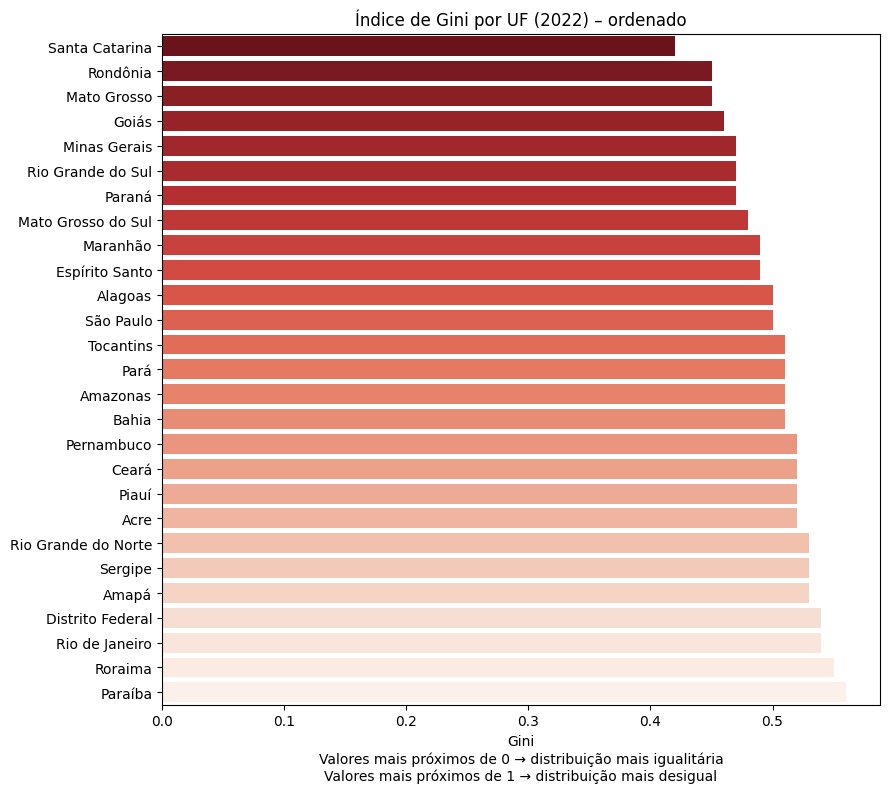

In [36]:
plt.figure(figsize=(9, 8))
ax = sns.barplot(
    data=df_g_sorted,
    x="gini", y="Estado",
    palette="Reds_r"
)

ax.set_title("Índice de Gini por UF (2022) – ordenado")
ax.set_xlabel("Gini")
ax.set_ylabel("")

# ▸ Observação adicional sob o eixo X
ax.text(
    0.5, -0.07,                                   # posição (x, y) em coordenadas do eixo
    "Valores mais próximos de 0 → distribuição mais igualitária\n"
    "Valores mais próximos de 1 → distribuição mais desigual",
    transform=ax.transAxes,
    ha="center", va="top",
    fontsize=10,
)

plt.tight_layout()
plt.show()

#### Mapa Indice de Gini 2022

In [37]:
pio.renderers.default = "browser"

br_map = read_state(year=2020).to_crs("EPSG:4326")
br_map = br_map.merge(df[["UF", "gini"]], left_on="abbrev_state", right_on="UF")

fig = px.choropleth(
    br_map,
    geojson=br_map.__geo_interface__,
    locations=br_map.index,
    color="gini",
    color_continuous_scale="Reds",
    hover_name="name_state",
    range_color=[df["gini"].min(), df["gini"].max()],
    title="Índice de Gini por UF (2022)",
)
fig.update_geos(fitbounds="locations", visible=False)
fig.show()          

### Análise de Analfabetismo (2022)

* **Ranking:** estados do menor para o maior percentual de analfabetismo.  
* **Resumo estatístico:** média, mediana, desvio‑padrão, valores mínimo e máximo.  
* **Visualização:** gráfico de barras horizontais e histograma para distribuição.  


#### Verificando Carregamento de  CSV Analfabetismo

In [38]:
try:
    df_a = df.copy()
except NameError:
    raise RuntimeError("O DataFrame principal (df) não está carregado.")

#### Ordenando

In [39]:
df_a_sorted = df_a.sort_values("analfabetismo").reset_index(drop=True)

#### Estatisticas Descritivas

In [40]:
stats_ana = df_a["analfabetismo"].describe().to_frame(name="Analfabetismo (%)")
display(stats_ana)

,Analfabetismo (%)
count,27.000000
mean,8.808889
std,4.896435
min,2.670000
25%,5.440000
50%,6.920000
75%,13.610000
max,17.660000


#### Gráfico de barras horizontais

/tmp/ipykernel_865908/4103734065.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




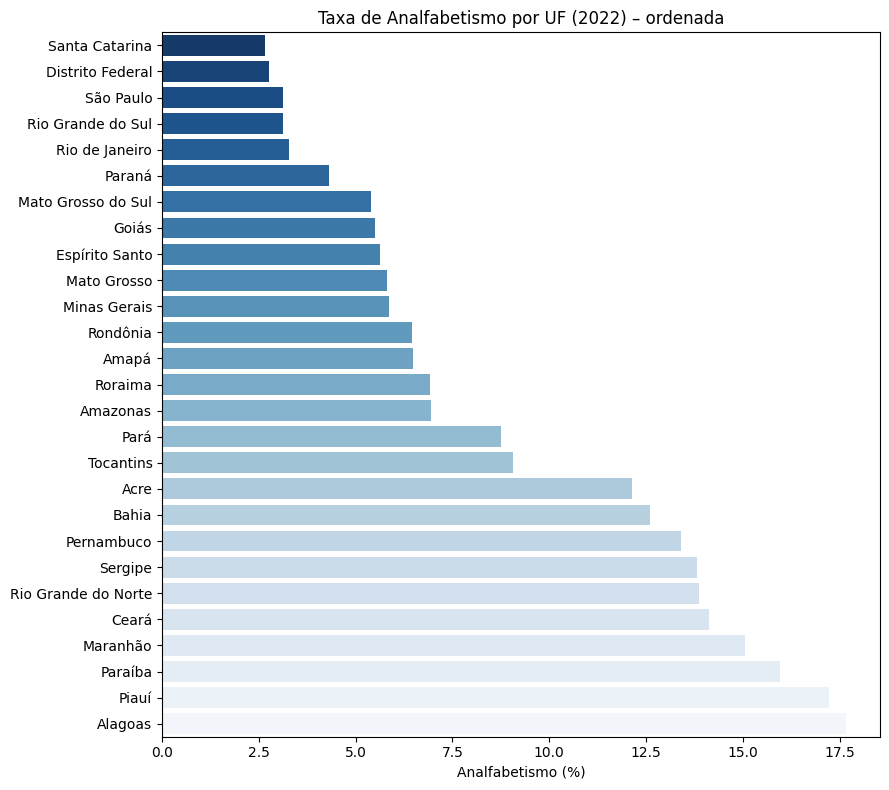

In [41]:
plt.figure(figsize=(9, 8))
sns.barplot(data=df_a_sorted, x="analfabetismo", y="Estado", palette="Blues_r")
plt.title("Taxa de Analfabetismo por UF (2022) – ordenada")
plt.xlabel("Analfabetismo (%)")
plt.ylabel("")
plt.tight_layout()
plt.show()

In [42]:
br_map_ana = read_state(year=2020).to_crs("EPSG:4326")
br_map_ana = br_map_ana.merge(df[["UF", "analfabetismo"]], 
                              left_on="abbrev_state", right_on="UF")

fig_ana = px.choropleth(
    br_map_ana,
    geojson=br_map_ana.__geo_interface__,
    locations=br_map_ana.index,
    color="analfabetismo",
    color_continuous_scale="Blues",
    hover_name="name_state",
    range_color=[df["analfabetismo"].min(), df["analfabetismo"].max()],
    title="Taxa de Analfabetismo (%) por UF (2022)",
)
fig_ana.update_geos(fitbounds="locations", visible=False)
fig_ana.show()      # abrirá em nova aba (ou iframe, se mudar o renderer)